# Box21 api

> Interact with your Box21

In [31]:
#| default_exp box21_api

In [32]:
#| notest
import os
from dotenv import load_dotenv

In [33]:
#| notest
load_dotenv()
API_USERNAME = os.environ.get('EMAIL')
API_PASSWORD = os.environ.get('PASSWORD')
API_PROJECT_ID = os.environ.get('PROJECT_ID')

In [34]:
#| export

from fastcore.utils import * # type: ignore

In [35]:
#| export

from typing import Any
import requests

class Box21Api:
    "Box21 Api class"
    def __init__(self, email:str, password:str, host:str, port:int, project_id:int):
        self.email = email
        self.password = password
        self.host = host
        self.port = port
        self.project_id = project_id
        self.token = self.get_token()
        
    def post(self, url :str , payload : Dict[str,Any], files : Optional[Dict[str, str]] = None):
        self.token = self.get_token()
        session = requests.Session()
        session.headers.update({'x-access-token': self.token})
        if files:
            response = session.post(self.host + ':' + str(self.port) + url, data=payload, files=files)
        else:
            response = session.post(self.host + ':' + str(self.port) + url, data=payload)
        return response
    
    def get(self, url : str, payload : Optional[Dict[str,str]]=None):
        self.token = self.get_token()
        session = requests.Session()
        session.headers.update({'x-access-token': self.token})
        response = session.get(self.host + ':' + str(self.port) + url, data=payload)
        return response
        
    def get_token(self):
        session = requests.Session()

        # Get token
        payload = {
            "email": self.email, "password": self.password}

        response = session.post(self.host + ':' + str(self.port) + '/api/login', data=payload)
        token = response.json().get('token')
        return token

In [36]:
#| notest

box21_api = Box21Api(API_USERNAME, API_PASSWORD, 'https://box21.ai', 443, API_PROJECT_ID) # type: ignore

### Retrieve assets

In [37]:
#| export

from box21_api.asset import Asset

@patch
def get_assets(self:Box21Api, offset:int=0, limit: Optional[int]=None) -> List[Asset]:

    print(self.project_id)
    payload : Dict[str, str] = {
        "offset": str(offset),
        "limit": limit, # type: ignore
        "project_id": str(self.project_id)
    }
    url = '/api/v2/assets'
    response = self.post(url, payload)

    print(response.text)
    
    asset_jsons = response.json()
    

    return [Asset.from_json(asset_json) for asset_json in asset_jsons]

@patch
def get_asset(self:Box21Api, asset_id: int) -> Asset:
    url = '/api/asset'
    response = self.post(url, {'asset_id': asset_id})
    asset_json = response.json()    
    return Asset.from_json(asset_json)

In [38]:
#| notest

box21_api = Box21Api(API_USERNAME, API_PASSWORD, 'https://box21.ai', 443, API_PROJECT_ID) # type: ignore
assets = box21_api.get_assets()
print('Number of assets retrieved', len(assets))
first_asset = assets[0]
print(first_asset)

1
[{"deleted":null,"filename":"8aa70857-ce54-4a02-a1ea-ed2a60d13340_example.png","id":234898,"in_validation_set":false,"liked":false,"meta":"{\"testing\": true}","original_category":"","path":"8aa70857-ce54-4a02-a1ea-ed2a60d13340_example.png","project_id":1,"relationships":{"annotations":[]},"unclear":null,"validated":"false"},{"deleted":null,"filename":"6e309b62-43fa-4185-a55f-6e01174ee57d_example.png","id":234899,"in_validation_set":false,"liked":false,"meta":"{\"testing\": true}","original_category":"","path":"6e309b62-43fa-4185-a55f-6e01174ee57d_example.png","project_id":1,"relationships":{"annotations":[]},"unclear":null,"validated":"false"},{"deleted":null,"filename":"6d0a5af1-720e-47ee-86e5-bc0c15fe2015_chitals.png","id":1,"in_validation_set":false,"liked":false,"meta":"{\"filename\": \"6d0a5af1-720e-47ee-86e5-bc0c15fe2015_chitals.png\", \"import\": \"true\", \"description\": \"Chital\"}","original_category":"","path":"6d0a5af1-720e-47ee-86e5-bc0c15fe2015_chitals.png","project_i

In [39]:
#| notest

first_asset = box21_api.get_asset(first_asset.id)
print(first_asset)

Asset({"testing": true})


In [40]:
#| export

from PIL import Image
import io

@patch
def download_asset(self:Box21Api, asset_id: int) -> Image.Image:
    self.token = self.get_token()
    url = '/api/asset/download'
    payload = {
        "asset_id": asset_id,
        "project_id": self.project_id
    }
    response = self.post(url, payload)

    return Image.open(io.BytesIO(response.content))

In [41]:
#| notest

box21_api = Box21Api(API_USERNAME, API_PASSWORD, 'https://box21.ai', 443, API_PROJECT_ID)
assets = box21_api.get_assets(limit=10)
image = box21_api.download_asset(assets[0].id)

1
[{"deleted":null,"filename":"8aa70857-ce54-4a02-a1ea-ed2a60d13340_example.png","id":234898,"in_validation_set":false,"liked":false,"meta":"{\"testing\": true}","original_category":"","path":"8aa70857-ce54-4a02-a1ea-ed2a60d13340_example.png","project_id":1,"relationships":{"annotations":[]},"unclear":null,"validated":"false"},{"deleted":null,"filename":"6e309b62-43fa-4185-a55f-6e01174ee57d_example.png","id":234899,"in_validation_set":false,"liked":false,"meta":"{\"testing\": true}","original_category":"","path":"6e309b62-43fa-4185-a55f-6e01174ee57d_example.png","project_id":1,"relationships":{"annotations":[]},"unclear":null,"validated":"false"},{"deleted":null,"filename":"6d0a5af1-720e-47ee-86e5-bc0c15fe2015_chitals.png","id":1,"in_validation_set":false,"liked":false,"meta":"{\"filename\": \"6d0a5af1-720e-47ee-86e5-bc0c15fe2015_chitals.png\", \"import\": \"true\", \"description\": \"Chital\"}","original_category":"","path":"6d0a5af1-720e-47ee-86e5-bc0c15fe2015_chitals.png","project_i

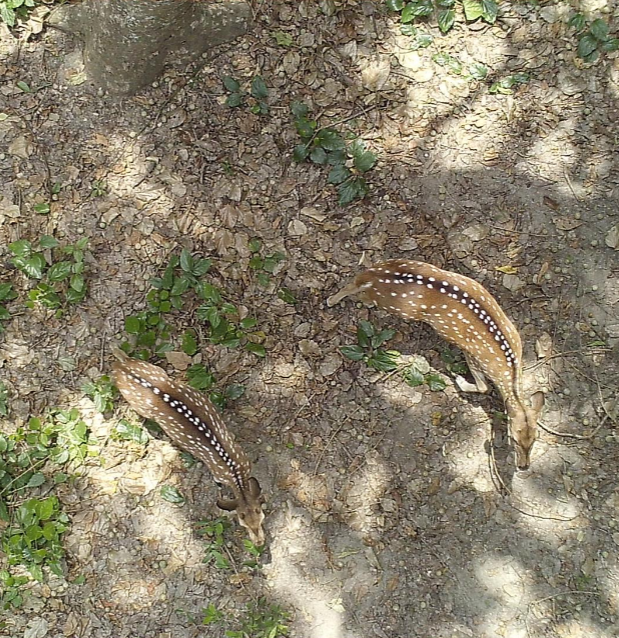

In [42]:
#| notest

image

In [43]:
#| export
import json

@patch
def get_assets_with_filters(self:Box21Api, filters: List[Dict[str, str]]) -> List[Asset]:
    api_endpoint = '/api/filter-assets'
        
    form_params : Dict[str, Any] = {
        'filters': json.dumps(filters),
        'project_id': self.project_id,
        'limit': 100000
    }

    response = self.post(
        api_endpoint,
        form_params
    )
        
    response_data = response.json()
    items = response_data.get('items', [])
    asset_ids = [item['id'] for item in items]

    # Second request to get asset details
    api_endpoint = '/api/v2/assets'
    form_params = {
        'asset_ids': json.dumps(asset_ids),
        'project_id': self.project_id,
        'limit': len(asset_ids)
    }

    response = self.post(
        api_endpoint,
        form_params
    )

    return [Asset.from_json(asset_json) for asset_json in response.json()]

In [44]:
#| export
@patch
def get_assets_containing_meta(self:Box21Api, meta: str, in_validation_set:bool=False) -> List[Asset]:
    filters : List[Dict[str, Any]] = [{"type":7,"value":meta}]

    if in_validation_set:
        filters.append({"type": 13, "value": 'Yes'})
    else:
        filters.append({"type": 13, "value": 'No'})   
    
    return self.get_assets_with_filters(filters)

@patch
def get_assets_not_containing_meta(self:Box21Api, meta: str, in_validation_set:bool=False) -> List[Asset]:
    filters : List[Dict[str, Any]]  = [{"type":8,"value":meta}]

    if in_validation_set:
        filters.append({"type": 13, "value": 'Yes'})
    else:
        filters.append({"type": 13, "value": 'No'})   
    
    return self.get_assets_with_filters(filters)

In [45]:
#| notest

print(asset.meta)

assets = box21_api.get_assets_containing_meta('testing')
print(len(assets), assets[0].meta)

assets = box21_api.get_assets_not_containing_meta('testing')
print(len(assets), assets[0].meta)

{"testing": true}
2 {"testing": true}
1 {"filename": "6d0a5af1-720e-47ee-86e5-bc0c15fe2015_chitals.png", "import": "true", "description": "Chital"}


### Filter annotations

In [46]:
#| export
import json
from box21_api.annotation import Box21Annotation, Box21BoundingBox, Box21Keypoint

@patch
def get_annotations(self:Box21Api, asset_id: int) -> List[Box21Annotation]:
    self.token = self.get_token()
    url = '/api/asset/annotations'
    payload = {
        "asset_id": asset_id,
    }
    response = self.post(url, payload)

    annotations : List[Box21Annotation] = []

    for annotation_json in response.json():
        asset_id = annotation_json['asset_id']
        annotation_id = annotation_json['id']
        certainty = annotation_json['certainty']
        label_id = annotation_json['label_id']
        project_id = annotation_json['project_id']
        validated = annotation_json['validated']
        coords = json.loads(annotation_json['coords'])

        if annotation_json['type'] == 1:
            x, y, w, h = coords
            annotations.append(
                Box21BoundingBox(asset_id, annotation_id, certainty, label_id, project_id, validated, x, y, w, h))
        else:
            x, y = coords
            annotations.append(
                Box21Keypoint(asset_id, annotation_id, certainty, label_id, project_id, validated, x, y))


    return annotations

In [47]:
#| notest

box21_api = Box21Api(API_USERNAME, API_PASSWORD, 'https://box21.ai', 443, API_PROJECT_ID)
annotations = box21_api.get_annotations(assets[0].id)
print(len(annotations))
print(annotations[0].project_id)

2
1


In [48]:
@patch
def get_annotations_with_label_name(self:Box21Api, label_name :str, validated : bool, asset_validated: bool, meta_contains: str, unclear: bool = False) -> List[Box21Annotation]:
    self.token = self.get_token()

    filters : List[dict[str, Union[str, int]]] = []

    filters = [
                {
                    "type": 27,
                    "value": label_name
                },
                {
                    "type": 17, "value": "Yes" if validated else "No"
                },
                {
                    "type": 9, "value": "Yes" if asset_validated else "No"
                },
                {
                    "type": 11, "value": "Yes" if unclear else "No"
                }
            ]

    if meta_contains:
            filters.append({
                "type": 7,
                "value": meta_contains
            })

    annotations = []
    
    url = '/api/asset/annotations'
    payload = {
        "asset_id": asset_id,
    }
    response = self.post(url, payload)

    annotations = []

    for annotation_json in response.json():
        asset_id = annotation_json['asset_id']
        annotation_id = annotation_json['id']
        certainty = annotation_json['certainty']
        label_id = annotation_json['label_id']
        label_name = annotation_json['relationships']['label']['name']
        project_id = annotation_json['project_id']
        validated = annotation_json['validated']
        coords = json.loads(annotation_json['coords'])

        if annotation_json['type'] == 1:
            x, y, w, h = coords
            annotations.append(
                Box21BoundingBox(asset_id, annotation_id, certainty, label_id, project_id, validated, x, y, w, h))
        else:
            x, y = coords
            annotations.append(
                Box21Keypoint(asset_id, annotation_id, certainty, label_id, project_id, validated, x, y))


    return annotations

### Update asset meta

An asset has meta which is a list of key value pairs. You can add, update and delete them via the api

In [49]:
#| export

@patch
def update_asset_meta(self:Box21Api, asset_id: int, key: str, value: str) -> [Box21Annotation]:
    self.token = self.get_token()
    url = '/api/asset/meta/update-value'
    payload = {
        "asset_id": asset_id,
        "key": key,
        "value": value
    }
    response = self.post(url, payload)

    return Asset.from_json(response.json())

@patch
def delete_asset_meta_key(self:Box21Api, asset_id: int, key: str) -> [Box21Annotation]:
    self.token = self.get_token()
    url = '/api/asset/meta/delete-key'
    payload = {
        "asset_id": asset_id,
        "key": key
    }
    response = self.post(url, payload)

    return Asset.from_json(response.json())

In [50]:
#| notest

box21_api = Box21Api(API_USERNAME, API_PASSWORD, 'https://box21.ai', 443, API_PROJECT_ID)
updated_asset = box21_api.update_asset_meta(assets[0].id, 'some_new_key', 'some new value')

print(json.loads(updated_asset.meta))

{'filename': '6d0a5af1-720e-47ee-86e5-bc0c15fe2015_chitals.png', 'import': 'true', 'description': 'Chital', 'some_new_key': 'some new value'}


In [51]:
#| notest

box21_api = Box21Api(API_USERNAME, API_PASSWORD, 'https://box21.ai', 443, API_PROJECT_ID)
updated_asset = box21_api.delete_asset_meta_key(assets[0].id, 'some_new_key')

print(json.loads(updated_asset.meta))

{'filename': '6d0a5af1-720e-47ee-86e5-bc0c15fe2015_chitals.png', 'import': 'true', 'description': 'Chital'}


### Get labels

Get all labels for a specific project

In [52]:
#| export

from box21_api.label import Box21Label

@patch
def get_labels(self:Box21Api) -> [Box21Label]:
    self.token = self.get_token()
    url = '/api/labels'
    payload = {
        "project_id": self.project_id
    }
    response = self.post(url, payload)

    labels = []
    for label_json in response.json():
        labels.append(
            Box21Label(
                id=label_json['id'],
                name=label_json['name'],
                parent_id=label_json['parent_id'],
                project_id=label_json['project_id'],
                type=label_json['type']
            ))

    return labels

In [53]:
#| notest

box21_api = Box21Api(API_USERNAME, API_PASSWORD, 'https://box21.ai', 443, API_PROJECT_ID)
labels = box21_api.get_labels()
print(labels[0])

Label(('Bounding box', 'Chital', 1))


### Get all annotations for a label:

In [54]:
#| export

@patch
def get_label_annotations(self:Box21Api, label: Box21Label) -> [Box21Annotation]:
    self.token = self.get_token()
    url = '/api/label/annotations'
    payload = {
        "label_id": label.id
    }
    response = self.post(url, payload)

    annotations = []

    for annotation_json in response.json():

        asset_id = annotation_json['asset_id']
        annotation_id = annotation_json['id']
        certainty = annotation_json['certainty']
        label_id = annotation_json['label_id']
        project_id = annotation_json['project_id']
        validated = annotation_json['validated']
        coords = json.loads(annotation_json['coords'])

        if annotation_json['type'] == 1:
            x, y, w, h = coords
            annotations.append(
                Box21BoundingBox(asset_id, annotation_id, certainty, label_id, project_id, validated, x, y, w, h))
        else:
            x, y = coords
            annotations.append(
                Box21Keypoint(asset_id, annotation_id, certainty, label_id, project_id, validated, x, y))
    return annotations

In [55]:
#| notest

box21_api = Box21Api(API_USERNAME, API_PASSWORD, 'https://box21.ai', 443, API_PROJECT_ID)
annotations = box21_api.get_label_annotations(labels[0])
print(len(annotations))
for annotation in annotations:
    print(annotation)

2
BoundingBox(1, (0.525, 0.3911, 0.3484, 0.3532))
BoundingBox(1, (0.1641, 0.5291, 0.2766, 0.3381))


### Adding and deleting assets

In [ ]:
#| export

from pathlib import Path
from box21_api.annotation import Annotation
from box21_api.annotation import BoundingBox
from box21_api.annotation import Keypoint

@patch
def add_asset(self:Box21Api, file_path: Path, meta : Dict[str, Any], annotations: List[Annotation]= [], validated : bool =False, in_validation_set : bool=False, no_duplicate_filename : bool = False) -> List[Asset]:

    if not isinstance(meta, dict):
        return 'meta argument should be a python dictionary'

    bounding_boxes : List[BoundingBox] = []
    keypoints : List[Keypoint] = []
    for annotation in annotations:
        if isinstance(annotation, BoundingBox):
            if annotation.x > 1:
                return 'Incorrect coordinates, should be between 0 and 1'
            bounding_boxes.append({
                'normalized_xywh': [annotation.x, annotation.y, annotation.width, annotation.height],
                'label': annotation.label_name,
                'confidence': annotation.certainty
            })
        elif isinstance(annotation, Keypoint):
            if annotation.x > 1:
                return 'Incorrect coordinates, should be between 0 and 1'
            keypoints.append({
                'normalized_xywh': [annotation.x, annotation.y],
                'label': annotation.label_name,
                'confidence': annotation.certainty
            })


    self.token = self.get_token()
    url = '/api/assets/add'
    payload = {
        'meta': json.dumps(meta),
        'validated': validated,
        'in_validation_set': in_validation_set,
        'filename': file_path.name,
        'bounding_boxes': json.dumps(bounding_boxes),
        'keypoints': json.dumps(keypoints),
        'project_id': self.project_id,
        'no_duplicate_filename': no_duplicate_filename
    }
    files = {'file': open(file_path, 'rb')}
    response = self.post(url, payload, files=files)
    #print(response.text)

    return Asset.from_json(response.json())

@patch
def delete_assets(self:Box21Api, asset_ids: List[int]):
    url = '/api/assets/delete'
    payload = {
        'asset_ids': json.dumps(asset_ids)
    }
    response = self.post(url, payload)
    return response

In [57]:
#| notest

image.save('example.png')
file_path = Path('example.png')
box21_api = Box21Api(API_USERNAME, API_PASSWORD, 'https://box21.ai', 443, API_PROJECT_ID)
asset = box21_api.add_asset(file_path, {'testing': True})

In [58]:
#| notest
print('Number of assets before delete', len(box21_api.get_assets()))

1
[{"deleted":null,"filename":"8aa70857-ce54-4a02-a1ea-ed2a60d13340_example.png","id":234898,"in_validation_set":false,"liked":false,"meta":"{\"testing\": true}","original_category":"","path":"8aa70857-ce54-4a02-a1ea-ed2a60d13340_example.png","project_id":1,"relationships":{"annotations":[]},"unclear":null,"validated":"false"},{"deleted":null,"filename":"6e309b62-43fa-4185-a55f-6e01174ee57d_example.png","id":234899,"in_validation_set":false,"liked":false,"meta":"{\"testing\": true}","original_category":"","path":"6e309b62-43fa-4185-a55f-6e01174ee57d_example.png","project_id":1,"relationships":{"annotations":[]},"unclear":null,"validated":"false"},{"deleted":null,"filename":"f9a88dd4-8f82-4dbd-8513-2ed09d3b5a45_example.png","id":234900,"in_validation_set":false,"liked":false,"meta":"{\"testing\": true}","original_category":"","path":"f9a88dd4-8f82-4dbd-8513-2ed09d3b5a45_example.png","project_id":1,"relationships":{"annotations":[]},"unclear":null,"validated":"false"},{"deleted":null,"fi

In [59]:
box21_api.delete_assets([asset.id])
print('Number of assets after delete', len(box21_api.get_assets()))

1
[{"deleted":null,"filename":"8aa70857-ce54-4a02-a1ea-ed2a60d13340_example.png","id":234898,"in_validation_set":false,"liked":false,"meta":"{\"testing\": true}","original_category":"","path":"8aa70857-ce54-4a02-a1ea-ed2a60d13340_example.png","project_id":1,"relationships":{"annotations":[]},"unclear":null,"validated":"false"},{"deleted":null,"filename":"6e309b62-43fa-4185-a55f-6e01174ee57d_example.png","id":234899,"in_validation_set":false,"liked":false,"meta":"{\"testing\": true}","original_category":"","path":"6e309b62-43fa-4185-a55f-6e01174ee57d_example.png","project_id":1,"relationships":{"annotations":[]},"unclear":null,"validated":"false"},{"deleted":null,"filename":"6d0a5af1-720e-47ee-86e5-bc0c15fe2015_chitals.png","id":1,"in_validation_set":false,"liked":false,"meta":"{\"filename\": \"6d0a5af1-720e-47ee-86e5-bc0c15fe2015_chitals.png\", \"import\": \"true\", \"description\": \"Chital\"}","original_category":"","path":"6d0a5af1-720e-47ee-86e5-bc0c15fe2015_chitals.png","project_i

Example adding a bounding box

In [60]:
#| notest

bounding_box = BoundingBox(
    certainty=0.9,
    label_name='Testing adding label',
    x= 0.0,
    y= 0.3,
    width= 0.1,
    height= 0.1
)

image.save('example.png')
file_path = Path('example.png')
box21_api = Box21Api(API_USERNAME, API_PASSWORD, 'https://box21.ai', 443, API_PROJECT_ID)
asset = box21_api.add_asset(file_path, {'testing': True}, annotations=[bounding_box])
print(asset)

Asset({"testing": true})


In [61]:
#| notest
asset_annotations = box21_api.get_annotations(asset.id)
asset_annotations

[BoundingBox(130, (0.0, 0.3, 0.1, 0.1))]

In [62]:
#| notest
print('Number of assets before delete', len(box21_api.get_assets()))
box21_api.delete_assets([asset.id])
print('Number of assets after delete', len(box21_api.get_assets()))

1
[{"deleted":null,"filename":"8aa70857-ce54-4a02-a1ea-ed2a60d13340_example.png","id":234898,"in_validation_set":false,"liked":false,"meta":"{\"testing\": true}","original_category":"","path":"8aa70857-ce54-4a02-a1ea-ed2a60d13340_example.png","project_id":1,"relationships":{"annotations":[]},"unclear":null,"validated":"false"},{"deleted":null,"filename":"6e309b62-43fa-4185-a55f-6e01174ee57d_example.png","id":234899,"in_validation_set":false,"liked":false,"meta":"{\"testing\": true}","original_category":"","path":"6e309b62-43fa-4185-a55f-6e01174ee57d_example.png","project_id":1,"relationships":{"annotations":[]},"unclear":null,"validated":"false"},{"deleted":null,"filename":"6d0a5af1-720e-47ee-86e5-bc0c15fe2015_chitals.png","id":1,"in_validation_set":false,"liked":false,"meta":"{\"filename\": \"6d0a5af1-720e-47ee-86e5-bc0c15fe2015_chitals.png\", \"import\": \"true\", \"description\": \"Chital\"}","original_category":"","path":"6d0a5af1-720e-47ee-86e5-bc0c15fe2015_chitals.png","project_i

### Updating jobs

In [ ]:
#| export
@patch
def update_job(self:Box21Api, job_id : int, processing : Optional[bool] = None, processed : Optional[bool] = None, progress : Optional[int] = None):
    url = '/api/update-job'
    payload : Dict[str, Any] = {
        'job_id': job_id,
        'processing': processing,
        'processed': processed,
        'progress': progress
        
    }
    return self.post(url, payload)